<a href="https://colab.research.google.com/github/bhuvighosh3/Real-time-Injury-Risk-Assessment-in-Athletes-based-on-Relative-Joint-Angles/blob/main/Research_paper_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Final_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Frame,Left Hip Angle,Left Knee Angle,Left Ankle Angle,Right Hip Angle,Right Knee Angle,Right Ankle Angle,Label
0,0,0,94.812632,58.435580,158.344713,50.868814,90.997492,143.526877,0
1,1,1,143.343706,21.679714,167.324577,93.469516,73.436309,161.910503,0
2,2,2,17.074711,68.669881,57.328718,3.635399,172.515210,139.940946,0
3,3,3,13.362944,112.783619,100.411549,6.266612,167.190803,141.916370,0
4,4,4,17.545851,81.925598,88.278504,10.327010,158.779645,135.958437,0


In [ ]:
df

,Unnamed: 0,Frame,Left Hip Angle,Left Knee Angle,Left Ankle Angle,Right Hip Angle,Right Knee Angle,Right Ankle Angle,Label
0,0,0,94.812632,58.435580,158.344713,50.868814,90.997492,143.526877,0
1,1,1,143.343706,21.679714,167.324577,93.469516,73.436309,161.910503,0
2,2,2,17.074711,68.669881,57.328718,3.635399,172.515210,139.940946,0
3,3,3,13.362944,112.783619,100.411549,6.266612,167.190803,141.916370,0
4,4,4,17.545851,81.925598,88.278504,10.327010,158.779645,135.958437,0
...,...,...,...,...,...,...,...,...,...
13819,13819,231,38.684773,24.442295,120.098761,67.934892,42.089769,131.909956,1
13820,13820,232,0.125193,179.632879,178.805814,34.214055,109.558364,145.293865,1
13821,13821,233,29.670906,87.133041,107.719644,21.654511,111.221129,145.002651,1
13822,13822,234,5.725501,166.060875,140.832239,48.187387,120.200163,138.735489,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'Frame', 'Left Hip Angle', 'Left Knee Angle',
       'Left Ankle Angle', 'Right Hip Angle', 'Right Knee Angle',
       'Right Ankle Angle', 'Label'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0','Frame'], axis = 1, inplace = True)

In [ ]:
df.head()

,Left Hip Angle,Left Knee Angle,Left Ankle Angle,Right Hip Angle,Right Knee Angle,Right Ankle Angle,Label
0,94.812632,58.435580,158.344713,50.868814,90.997492,143.526877,0
1,143.343706,21.679714,167.324577,93.469516,73.436309,161.910503,0
2,17.074711,68.669881,57.328718,3.635399,172.515210,139.940946,0
3,13.362944,112.783619,100.411549,6.266612,167.190803,141.916370,0
4,17.545851,81.925598,88.278504,10.327010,158.779645,135.958437,0


### Logistic Regression:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features (X) and the target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LogisticRegression model
model = LogisticRegression(C=10, penalty='l2')

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Predict on the training data
y_pred_train = model.predict(X_train_scaled)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Training Accuracy: {accuracy_train:.2f}")

Test Accuracy: 0.67
Training Accuracy: 0.67


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.34      0.66      0.45       722
           1       0.88      0.67      0.76      2734

    accuracy                           0.67      3456
   macro avg       0.61      0.66      0.61      3456
weighted avg       0.77      0.67      0.69      3456



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Training Accuracy: 0.67
Test Accuracy: 0.67


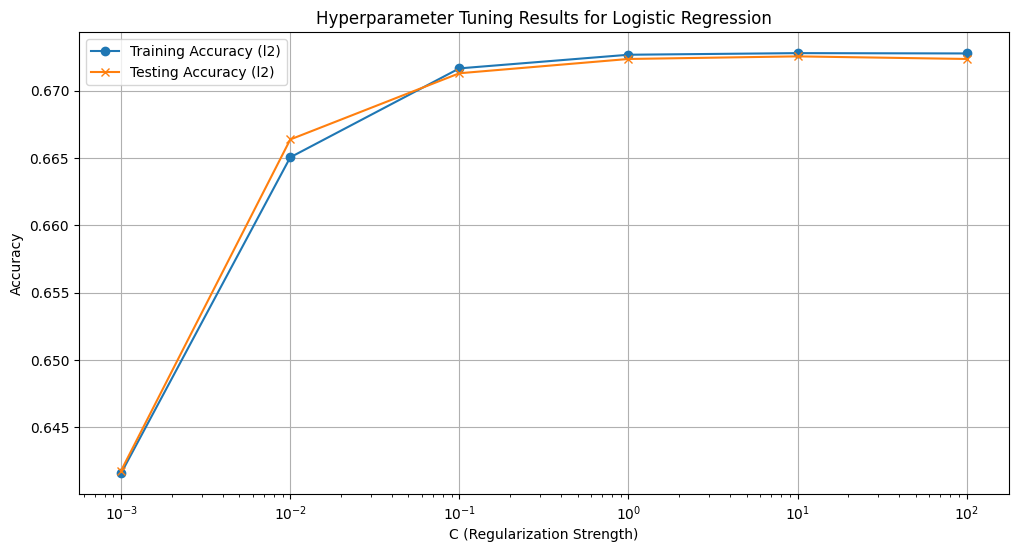

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Split the data into features (X) and the target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LogisticRegression model
model = LogisticRegression()

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Regularization type
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score = True)

# Fit the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_test = best_model.predict(X_test_scaled)

# Calculate accuracy on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)

# Predict on the training data using the best model
y_pred_train = best_model.predict(X_train_scaled)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")

import matplotlib.pyplot as plt
import numpy as np

# Extract results from the grid search
results = grid_search.cv_results_

# Extract relevant information for plotting
C_values = np.array(results['param_C'].data, dtype=float)
penalty_values = results['param_penalty']
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

# Create masks for 'l1' and 'l2' penalty values
l1_mask = (penalty_values == 'l1')
l2_mask = (penalty_values == 'l2')

# Plotting
plt.figure(figsize=(12, 6))

# Plot training accuracy for 'l1' penalty
# plt.plot(C_values[l1_mask], mean_train_scores[l1_mask], label='Training Accuracy (l1)', marker='o', linestyle='-')

# Plot testing accuracy for 'l1' penalty
# plt.plot(C_values[l1_mask], mean_test_scores[l1_mask], label='Testing Accuracy (l1)', marker='x', linestyle='-')

# Plot training accuracy for 'l2' penalty
plt.plot(C_values[l2_mask], mean_train_scores[l2_mask], label='Training Accuracy (l2)', marker='o', linestyle='-')

# Plot testing accuracy for 'l2' penalty
plt.plot(C_values[l2_mask], mean_test_scores[l2_mask], label='Testing Accuracy (l2)', marker='x', linestyle='-')

plt.xscale('log')  # Use a logarithmic scale for better visualization of C values
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning Results for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pickle
with open('best_logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

### Decision Tree:

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
pred_train = model.predict(X_train)
acc_train = accuracy_score(y_train, pred_train)
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Train Accuracy: {acc_train:.2f}")

Test Accuracy: 0.64
Train Accuracy: 1.00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.66


In [ ]:
y_pred = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


### Light GBM:

In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import pickle
import numpy as np

# Assuming you've already loaded your data into a DataFrame 'df'

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

params = {
    'objective': 'binary',  # Binary classification problem
    'metric': 'binary_logloss',  # Evaluation metric
}

# Create a LightGBM dataset for the training data
train_data = lgb.Dataset(X_train, label=y_train)

# Define a parameter grid to sample from
param_dist = {
    'boosting_type': ['gbdt', 'dart'],  # Gradient boosting type
    'num_leaves': [31, 50, 100],      # Maximum number of leaves in one tree
    'learning_rate': np.linspace(0.05, 0.2, 4)  # Step size shrinkage
}

# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective=params['objective'], metric=params['metric'])

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', verbose=2, random_state=42)

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(objective=params['objective'], metric=params['metric'], **best_params)
best_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = best_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy with best hyperparameters: {train_accuracy:.2f}")

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy with best hyperparameters: {test_accuracy:.2f}")

# Save the best model to a pickle file
with open('best_lgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3754, number of negative: 2420
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 6174, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.608034 -> initscore=0.439054
[LightGBM] [Info] Start training from score 0.439054
[CV] END boosting_type=gbdt, learning_rate=0.15000000000000002, num_leaves=100; total time=   0.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3754, number of negative: 2421
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_

In [ ]:
import lightgbm as lgb
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you've already loaded your data into a DataFrame 'df'

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

params = {
    'objective': 'binary',  # Binary classification problem
    'metric': 'binary_logloss',  # Evaluation metric
}

# Define a parameter grid to search
param_grid = {
    'boosting_type': ['gbdt', 'dart'],  # Gradient boosting type
    'num_leaves': [11, 12, 13, 14, 15],      # Maximum number of leaves in one tree
    'learning_rate': np.linspace(0.13, 0.16, 6)  # Step size shrinkage
}

# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective=params['objective'], metric=params['metric'])

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(objective=params['objective'], metric=params['metric'], **best_params)
best_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = best_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy with best hyperparameters: {train_accuracy:.2f}")

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy with best hyperparameters: {test_accuracy:.2f}")

# Extract results from the grid search
param_values = [params['num_leaves'] for params in grid_search.cv_results_['params']]  # Correct way to get num_leaves
mean_train_scores = grid_search.cv_results_['mean_train_score']
mean_test_scores = grid_search.cv_results_['mean_test_score']
std_train_scores = grid_search.cv_results_['std_train_score']
std_test_scores = grid_search.cv_results_['std_test_score']

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean training scores with std
plt.errorbar(param_values, mean_train_scores, yerr=std_train_scores, label='Mean Train Accuracy', marker='o')

# Plot mean testing scores with std
plt.errorbar(param_values, mean_test_scores, yerr=std_test_scores, label='Mean Test Accuracy', marker='o')

plt.title('Hyperparameter Tuning Results')
plt.xlabel('Number of Leaves')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Save the best model to a pickle file
with open('best_lgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4473, number of negative: 2899
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 7372, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.606755 -> initscore=0.433693
[LightGBM] [Info] Start training from score 0.433693
[CV] END boosting_type=gbdt, learning_rate=0.13, num_leaves=11; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4474, number of negative: 2899
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010019 seconds.
You can set `force_col_wise=true` 

KeyError: ignored

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4473, number of negative: 2899
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 7372, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.606755 -> initscore=0.433693
[LightGBM] [Info] Start training from score 0.433693
[CV] END boosting_type=gbdt, learning_rate=0.13, num_leaves=11; total time=   0.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4474, number of negative: 2899
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_col_wise=true` 

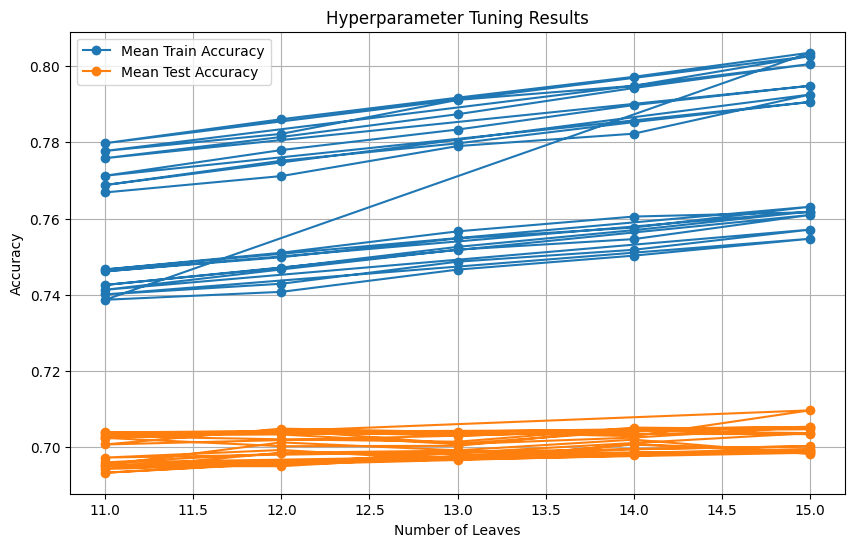

In [ ]:
import lightgbm as lgb
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you've already loaded your data into a DataFrame 'df'

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

params = {
    'objective': 'binary',  # Binary classification problem
    'metric': 'binary_logloss',  # Evaluation metric
}

# Define a parameter grid to search
param_grid = {
    'boosting_type': ['gbdt', 'dart'],  # Gradient boosting type
    'num_leaves': [11, 12, 13, 14, 15],      # Maximum number of leaves in one tree
    'learning_rate': np.linspace(0.13, 0.16, 6)  # Step size shrinkage
}

# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective=params['objective'], metric=params['metric'])

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, return_train_score=True)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(objective=params['objective'], metric=params['metric'], **best_params)
best_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = best_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy with best hyperparameters: {train_accuracy:.2f}")

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy with best hyperparameters: {test_accuracy:.2f}")

# Extract results from the grid search
param_values = [params['num_leaves'] for params in grid_search.cv_results_['params']]  # Correct way to get num_leaves
mean_train_scores = grid_search.cv_results_['mean_train_score']
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean training scores
plt.plot(param_values, mean_train_scores, label='Mean Train Accuracy', marker='o')

# Plot mean testing scores
plt.plot(param_values, mean_test_scores, label='Mean Test Accuracy', marker='o')

plt.title('Hyperparameter Tuning Results')
plt.xlabel('Number of Leaves')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Save the best model to a pickle file
with open('best_lgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.56      0.60      1116
           1       0.73      0.80      0.76      1649

    accuracy                           0.70      2765
   macro avg       0.69      0.68      0.68      2765
weighted avg       0.70      0.70      0.70      2765



In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've already loaded your data into a DataFrame 'df'

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'objective': 'binary',  # Binary classification problem
    'metric': 'binary_logloss',  # Evaluation metric
}

# Create a LightGBM dataset for the training data
train_data = lgb.Dataset(X_train, label=y_train)

# Define a parameter grid to sample from
param_dist = {
    'boosting_type': ['gbdt', 'dart'],  # Gradient boosting type
    'num_leaves': [31, 50, 100],      # Maximum number of leaves in one tree
    'learning_rate': np.linspace(0.05, 0.2, 4)  # Step size shrinkage
}

# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective=params['objective'], metric=params['metric'])

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', verbose=2, random_state=42)

# Lists to store training and testing accuracy and error
train_accuracy_list = []
test_accuracy_list = []
train_error_list = []
test_error_list = []

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(objective=params['objective'], metric=params['metric'], **best_params)
best_model.fit(X_train, y_train)

# Training and testing accuracy and error
for i in range(random_search.n_iter):
    best_model.set_params(**random_search.cv_results_['params'][i])
    best_model.fit(X_train, y_train)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy

    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    train_error_list.append(train_error)
    test_error_list.append(test_error)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy_list, label='Training Accuracy', marker='o')
plt.plot(test_accuracy_list, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_error_list, label='Training Error', marker='o')
plt.plot(test_error_list, label='Testing Error', marker='o')
plt.title('Training and Testing Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()
'''

'\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split, RandomizedSearchCV\nimport lightgbm as lgb\nfrom sklearn.metrics import accuracy_score\nimport pickle\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Assuming you\'ve already loaded your data into a DataFrame \'df\'\n\nX = df.drop(\'Label\', axis=1)\ny = df[\'Label\']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nparams = {\n    \'objective\': \'binary\',  # Binary classification problem\n    \'metric\': \'binary_logloss\',  # Evaluation metric\n}\n\n# Create a LightGBM dataset for the training data\ntrain_data = lgb.Dataset(X_train, label=y_train)\n\n# Define a parameter grid to sample from\nparam_dist = {\n    \'boosting_type\': [\'gbdt\', \'dart\'],  # Gradient boosting type\n    \'num_leaves\': [31, 50, 100],      # Maximum number of leaves in one tree\n    \'learning_rate\': np.linspace(0.05, 0.2, 4)  # Step size shrinkage\n}\n\n# Create a Light

## Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = RandomForestClassifier(random_state=42, max_depth = 8, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
# Fit the model on the training data
model.fit(X_train, y_train)
# Predict on the test data
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
pred_train = model.predict(X_train)
acc_train = accuracy_score(y_train, pred_train)
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Train Accuracy: {acc_train:.2f}")
with open('research_RF.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

Test Accuracy: 0.69
Train Accuracy: 0.77


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.48      0.55      1387
           1       0.70      0.83      0.76      2069

    accuracy                           0.69      3456
   macro avg       0.68      0.65      0.66      3456
weighted avg       0.68      0.69      0.68      3456



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer
import pickle

f1_scorer = make_scorer(f1_score)

X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Predict on the training data
y_train_pred = best_model.predict(X_train)

# Calculate accuracy on the training data
acc_train = accuracy_score(y_train, y_train_pred)

print(f"Test Accuracy with best hyperparameters: {accuracy:.2f}")
print(f"Train Accuracy with best hyperparameters: {acc_train:.2f}")

# Save the best model to a pickle file
with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Test Accuracy with best hyperparameters: 0.71
Train Accuracy with best hyperparameters: 1.00
